<a href="https://colab.research.google.com/github/angelmetanosaa/DTI-Multiple-Linier-Regression/blob/main/Assignment_Multiple_Linier_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Nama : Angel Metanosa Afinda
## NIP : DS0204

# **Regression**
Multiple Linier Regression (analisis regresi linier ganda) adalah analisis statistik yang digunakan untuk mengetahui pengaruh beberapa variabel bebas (independent) terhadap variabel terikat (dependent).

Pada notebook ini, saya akan melakukan Multiple Linier Regression pada dataset pie yang berisi tentang data penjualan pie

## **Multiple Linear Regression**

### Import Library
Tahap pertama yang dilakukan adalah import library yang dibutuhkan seperti, pandas, statsmodel, seaborn, matplotlib, dan sklearn

In [ ]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (7, 7)
plt.style.use('ggplot')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Import Dataset

In [ ]:
# Import Dataset
df_pie = pd.read_csv('https://raw.githubusercontent.com/rc-dbe/dti/main/data/pie-sales.csv', sep =";")
#menampilkan dataset
df_pie

,week,pie_sales,price,advertising
0,1,350,5.5,3.3
1,2,460,7.5,3.3
2,3,350,8.0,3.0
3,4,430,8.0,4.5
4,5,350,6.8,3.0
5,6,380,7.5,4.0
6,7,430,4.5,3.0
7,8,470,6.4,3.7
8,9,450,7.0,3.5
9,10,490,5.0,4.0


## Preprocessing

Pada dataframe di atas, terdapat 3 kolom yaitu pie_sales, price, and advertising serta memiliki data sebanyak 15 baris. Dengan data ini, saya akan mencoba untuk memprediksi jumlah pie yang akan terjual berdasarkan harga jualnya dan biaya iklan yang dikeluarkan.

In [ ]:
#melakukan shaping pada dataset agar mengetahui jumlah kolo
df_pie.shape

(15, 4)

In [ ]:
#menampilkan info typedata dan jumlah kolom maupun baris pada dataset
df_pie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   week         15 non-null     int64  
 1   pie_sales    15 non-null     int64  
 2   price        15 non-null     float64
 3   advertising  15 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 608.0 bytes


In [ ]:
#melakukan describe pada dataset untuk melihat hubungan korelasi antar kolom berdasarkan mean, min, std, max, dll
df_pie.describe()

,week,pie_sales,price,advertising
count,15.000000,15.000000,15.000000,15.00000
mean,8.000000,399.333333,6.613333,3.48000
std,4.472136,63.523524,1.171609,0.48873
min,1.000000,300.000000,4.500000,2.70000
25%,4.500000,350.000000,5.700000,3.10000
50%,8.000000,430.000000,7.000000,3.50000
75%,11.500000,450.000000,7.500000,3.85000
max,15.000000,490.000000,8.000000,4.50000


Pada bagian ini, akan ditampilkan hubungan antar variabel. Untuk melakukan ini, digunakan library seaborn dan fungsu pairplot(). Fungsi ini akan menampilkan grafik yang terdiri dari histogram dan scatter plot dan menggambarkan hubungan variabel yang ada pada dataset

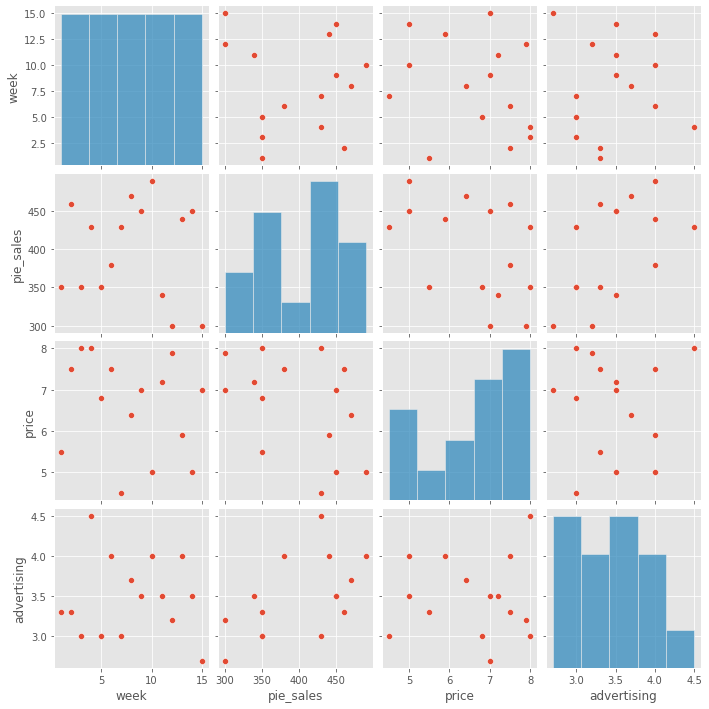

In [ ]:
sns.pairplot(df_pie)

Analysis Week

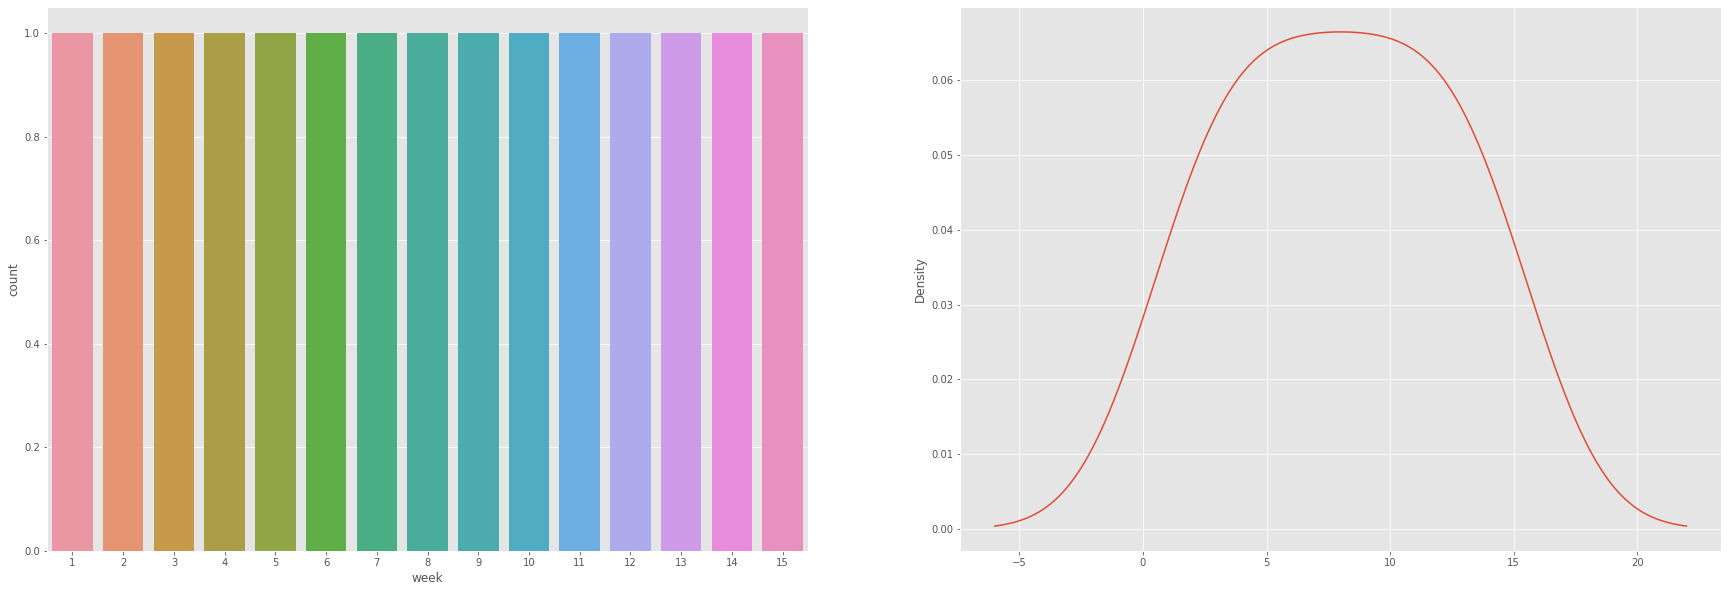

In [ ]:
# Exploratory Data Analysis untuk mengenal data lebih jauh
# Univariate analysis week

f = plt.figure(figsize=(30,10))

f.add_subplot(1,2,1)
sns.countplot(df_pie['week'])

f.add_subplot(1,2,2)
df_pie['week'].plot(kind='kde')

plt.show()


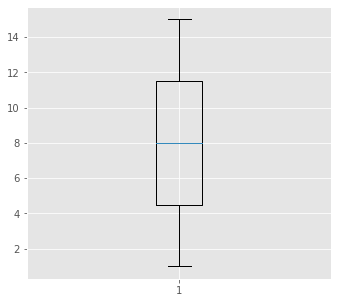

In [ ]:
#Univariate analysis week
#Menampilkan outlier pada kolom week

f = plt.figure(figsize=(12,5))

f.add_subplot(1,2,1)
plt.boxplot(df_pie['week'])
plt.show()

Analisis pie_sales

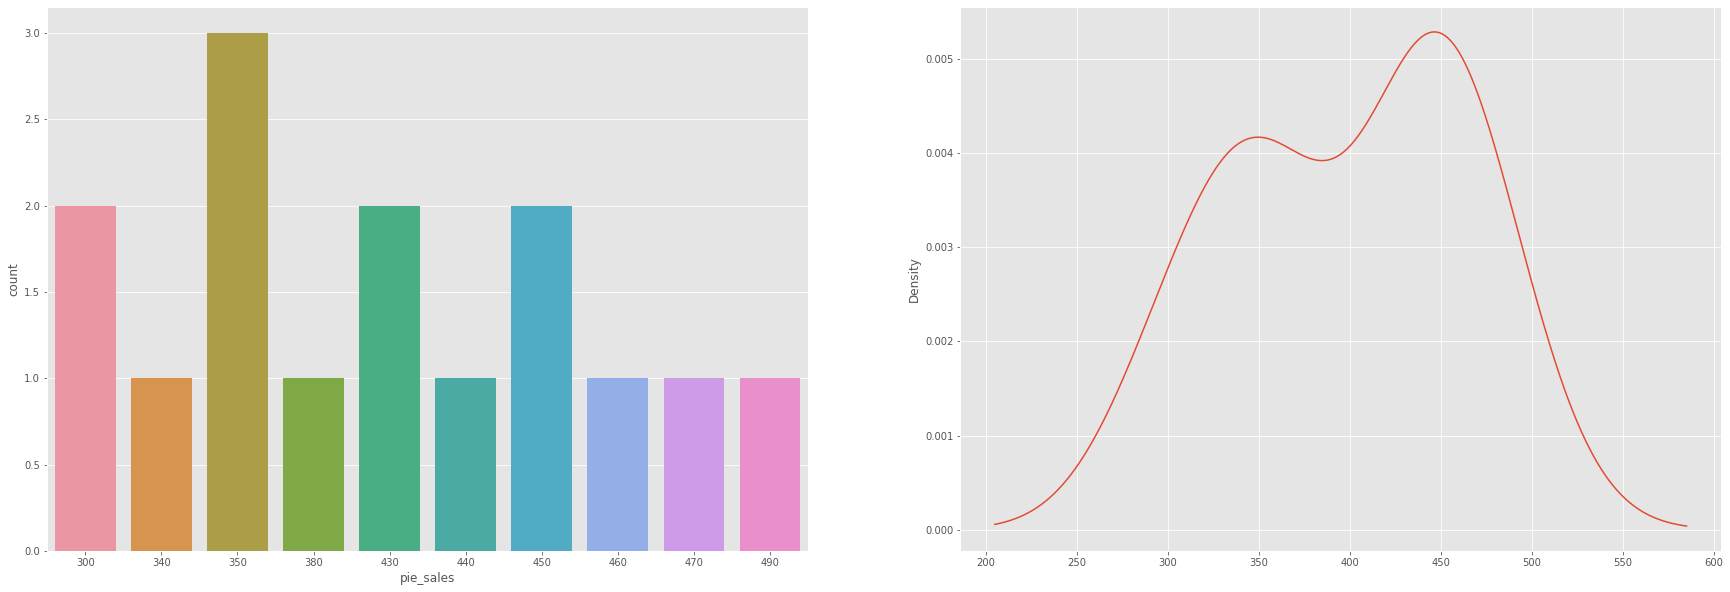

In [ ]:
# Exploratory Data Analysis untuk mengenal data lebih jauh
# Univariate analysis pie_sales

f = plt.figure(figsize=(30,10))

f.add_subplot(1,2,1)
sns.countplot(df_pie['pie_sales'])

f.add_subplot(1,2,2)
df_pie['pie_sales'].plot(kind='kde')
plt.show()


Pada grafik diatas, dapat dilihat bahwa penjualan pie tertinggi terdapat pada jumlah 350 buah pie

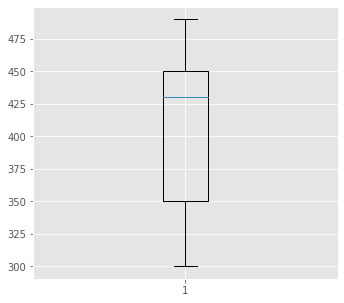

In [ ]:
# Exploratory Data Analysis untuk mengenal data lebih jauh
#Univariate analysis price

f = plt.figure(figsize=(12,5))

f.add_subplot(1,2,1)
plt.boxplot(df_pie['pie_sales'])
plt.show()


Tidak ada outlier pada kolom pie_sales

Analisis Price

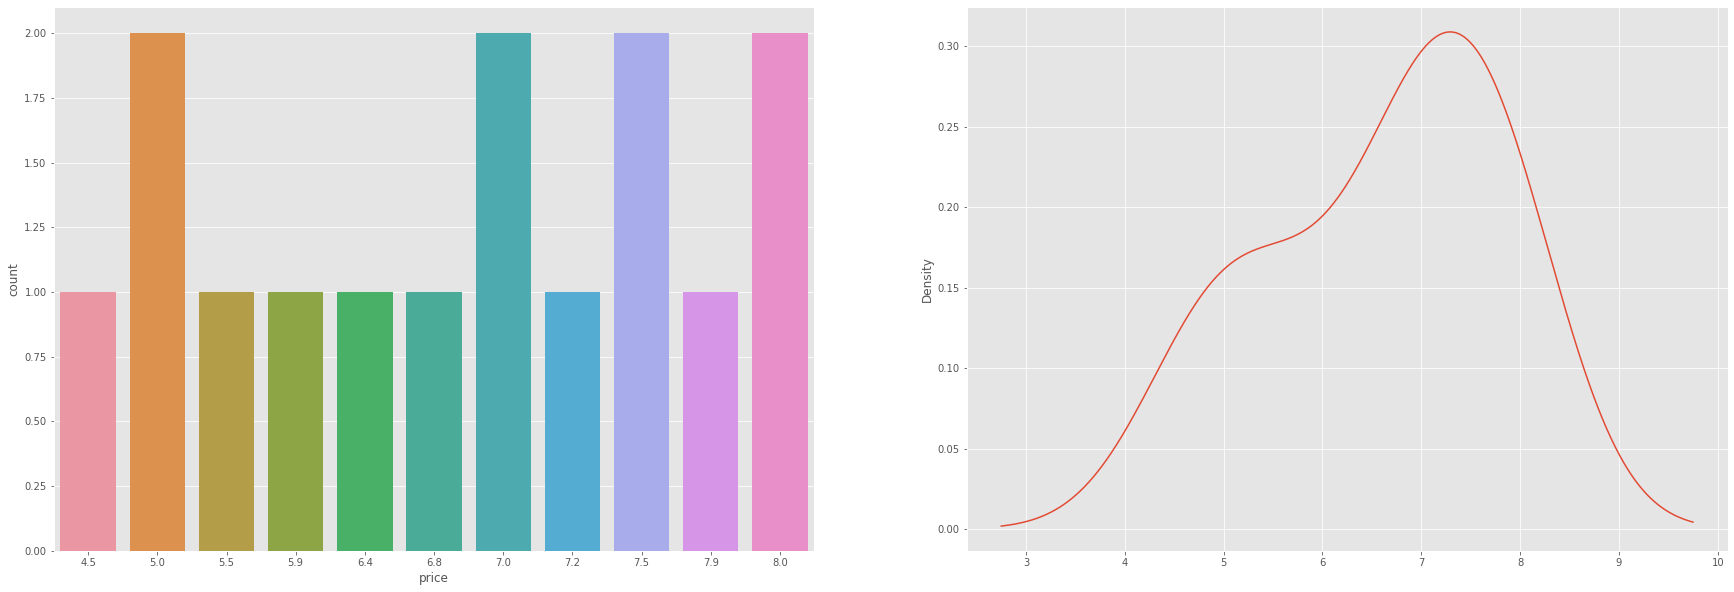

In [ ]:
# Exploratory Data Analysis untuk mengenal data lebih jauh
#Univariate analysis price

f = plt.figure(figsize=(30,10))

f.add_subplot(1,2,1)
sns.countplot(df_pie['price'])

f.add_subplot(1,2,2)
df_pie['price'].plot(kind='kde')

plt.show()

Pada grafik diatas, harga dari pie yang paling sering muncul adalah harga 5, 7, 7.5, dan 8

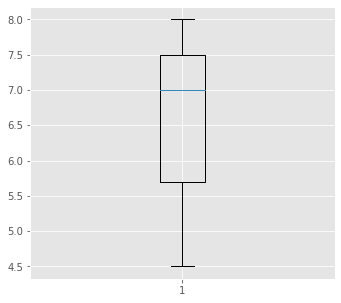

In [ ]:
f = plt.figure(figsize=(12,5))

f.add_subplot(1,2,1)
plt.boxplot(df_pie['price'])
plt.show()

Tidak ada outlier pada kolom price

Analisis Advertising

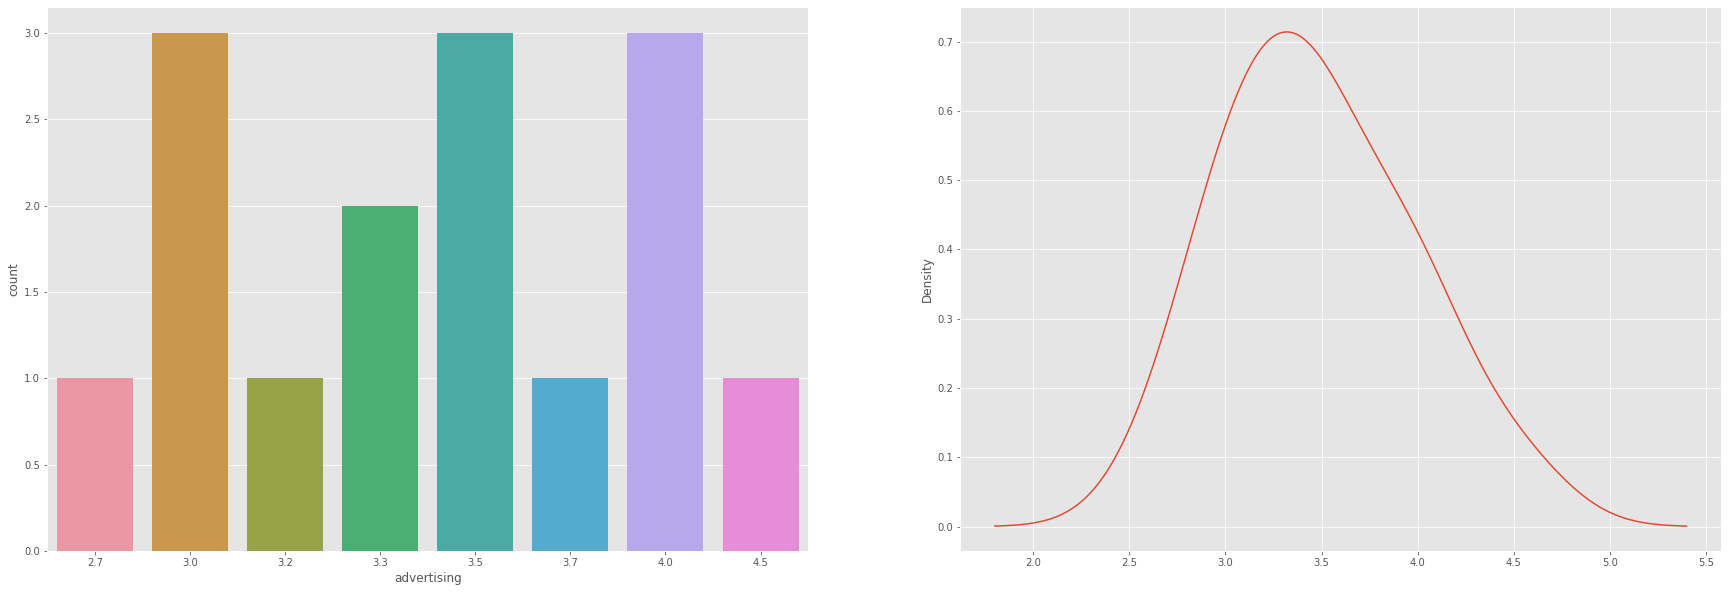

In [ ]:
# Exploratory Data Analysis untuk mengenal data lebih jauh
#Univariate analysis price

f = plt.figure(figsize=(30,10))

f.add_subplot(1,2,1)
sns.countplot(df_pie['advertising'])

f.add_subplot(1,2,2)
df_pie['advertising'].plot(kind='kde')

Pada grafik diatas, advertising yang sering muncul adalah 3.0, 3.5, dan 4.0

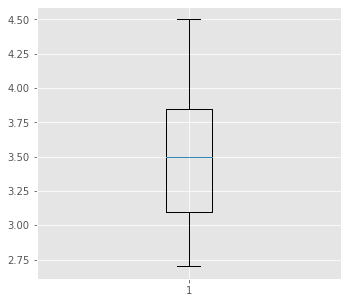

In [ ]:
f = plt.figure(figsize=(12,5))

f.add_subplot(1,2,1)
plt.boxplot(df_pie['advertising'])
plt.show()

Tidak ada outlier


# Membuat Model Regresi

In [ ]:
#Mengetahui nilai korelasi dari independent variable dan dependent variable.

df_pie.corr().style.background_gradient().set_precision(2)

,week,pie_sales,price,advertising
week,1.00,-0.07,-0.23,-0.04
pie_sales,-0.07,1.00,-0.44,0.56
price,-0.23,-0.44,1.00,0.03
advertising,-0.04,0.56,0.03,1.00


### **Regression using Sklearn**

In [ ]:
#Pertama, buat variabel x dan y.
x = df_pie[['price', 'advertising']]
y = df_pie['pie_sales']

#Mendeklarasikan object linear regresi.
lin_reg = LinearRegression()

#Train model menggunakan training variabel x dan y yang sudah dideskripsikan
lin_reg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)



Pada bagian ini, saya akan menampilkan nilai dari Coefficients, Intercept, Accuracy Score

1. Intercept merupakan titik sumbu vertikal yang merupakan nilai variabel tergantung yang diprediksi saat nilai prediktor atau variabel bebas sebesar nol. Nilai yang diprediksi akan sebesar akan sebesar 0 jika koefesien regresi baku digunakan.

2. Coefficients merupakan nilai yang menggambarkan hubungan variabel bebas terhadap variabel terikat

In [ ]:
#Menampilkan nilai slope/koefisien (m) dan intercept (b).
print('Coefficients : \n',lin_reg.coef_)
print('----------------------------------\n')
print('Intercept : \n', lin_reg.intercept_)
print('----------------------------------\n')

#Menampilkan accuracy score dari model menggunakan variabel x dan y
print('Accuracy Score : \n',lin_reg.score(x, y))

Coefficients : 
 [-24.97508952  74.13095749]
----------------------------------

Intercept : 
 306.5261932837436
----------------------------------

Accuracy Score : 
 0.5214779360292288


**PEMBAHASAN**
1. Dalam kasus prediksi ini apabila menjual pie seharga 0 dan mengeluarkan biaya iklan (advertising) sebesar 0 maka akan terjual 306 pie.

2. Pada bagian coefficients ini terdapat 2 variabel yaitu untuk variabel price dan variabel advertising. Nilai ini menggambarkan keterkaitan antara variabel bebas terhadap variabel terikat.



Model ini akan menghasilkan hasil dari  rumus linear regresi yakni:

xxx.PNG

y = 306.526 - 24.975(price) + 74.13(advertising)



### **Regression using Statsmodels**

In [ ]:
import statsmodels.api as sm

In [ ]:
X = df_pie[['price', 'advertising']]

# Menambahkan constant
X = sm.add_constant(X)

model = sm.OLS(df_pie['pie_sales'], X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              pie_sales   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     6.539
Date:                Fri, 23 Oct 2020   Prob (F-statistic):             0.0120
Time:                        16:24:36   Log-Likelihood:                -77.510
No. Observations:                  15   AIC:                             161.0
Df Residuals:                      12   BIC:                             163.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         306.5262    114.254      2.683      


## Coefficient of Determination ($R^2$)

In [ ]:
print('R2 score:', model.rsquared)

R2 score: 0.5214779360292285



Validasi model dapat dilakukan dengan mencari $R^2$ yang merupakan nilai keterikatan variabel tak bebas atau terikat yang dapat diprediksi dari variabel bebas dengan formula atau rumus sebagai berikut :

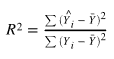

Dari tabel OLS diatas, didapatkan nilai dari $R^2$ adalah 0.5214 yang berarti 52,14% dari variabel terikat kita dapat dijelaskan menggunakan variabel bebas yang ada.

### **F-test**

F-test adalah setiap uji statistik di mana statistik uji memiliki distribusi-F di bawah hipotesis nol. Hal ini paling sering digunakan ketika membandingkan model statistik yang telah dipasang pada kumpulan data, untuk mengidentifikasi model yang paling sesuai dengan populasi dari mana data diambil sampelnya.



In [ ]:
print('F-statistic:', model.fvalue)
print('Peluang untuk mendapatkan nilai senilai F-statistic :', model.f_pvalue)

F-statistic: 6.538606789020464
Peluang untuk mendapatkan nilai senilai F-statistic : 0.01200637223318641


### **T-test**

T-test adalah adalah uji hipotesis statistik apa pun di mana statistik uji mengikuti distribusi-t di bawah hipotesis nol.

In [ ]:
print(model.pvalues)

const          0.019932
price          0.039788
advertising    0.014494
dtype: float64


## Pengujian Prediksi

In [ ]:
price = float(input("Input Price = "))
advertising = float(input("Input Advertising = "))

y = 306.5261932837436 - 24.97508952 * price + 74.13095749 * advertising

print("Prediksi Penjualan Pie : ", y)

Input Price = 9.8
Input Advertising = 5.5
Prediksi Penjualan Pie :  469.49058218274365


# Kesimpulan

Menggunakan model yang sudah dibangun, maka dapat diprediksi penjualan pie menggunakan 2 variabel independen yaitu price dan advertising serta dari model yang sudah diprediksi, didapatkan hasil bahwa $R^2$ sebesar 52,14% yang artinya diantara 100% terdapat sekitar 48% faktor yang belum diketahui pada datasetyang akan mempengaruhi penjualan pie

